### Capstone Project -  Perfumes Recommendation System 
#### EDA - Reviews Dataset

#### Import packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

- Reviewa Dataset: 
This dataset contain User nickname, Perfume_name, Brand, Fragrance_Family, Overall_rating, User_rating, Revirews, Date.

In [2]:
Reviews_df = pd.read_csv("C:/Users/hmq4/OneDrive/Desktop/Data Science- Misk/chrome/Misk_DSI_Capstone_Project/Dataset/Datasets/Reviews_Dataset.csv")

Data Dictionary:
1. Name of the perfume
2. Brand
3. price 
4. Fragrance_family
5. Overall_rating : average rating on a scale 0-5
6. rate_count : this represent the number of users who rated this perfumes 
7. Username : user nickname 
8. User_rating : user personal rating that comes along with the review 
9. Title: each review have a title given by the user that summurize the overall exprection 
10. Review: user comment about the perfume
11. Date

#### 1. EDA

In [3]:
Reviews_df.head()

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Name,Brand,Price,Fragrance_Family,Overall_rating,rate_count,Username,User_rating,Title,Review,Date
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Maqam Al Shoyoukh EDP - 120 ml,Maqam - Perfume,700 SAR,Floral Oriental,5.0,1,Aya,5,A Must Have!,This fragrance is breathtaking... Aside from t...,2021-12-28
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1,Ajmal Raindrops,Ajmal - Perfume,46 SAR,Floral,5.0,3,Shamma Almarzouqi,5,SM,Smell amazing???,2021-11-02
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2,Ajmal Raindrops,Ajmal - Perfume,46 SAR,Floral,5.0,3,Reema,5,روعه,روعه لا يفوتكم,2020-12-28
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3,Ajmal Raindrops,Ajmal - Perfume,46 SAR,Floral,5.0,3,Nataliia,5,Long Lasting,long lasting and valuable price,2020-10-06
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4,Calvin Klein Euphoria Men Intense,Calvin Klein - Perfume,145 SAR,Romantic,4.0,3,Sara,5,جذابة و ثابتة,ليس غريبا ان تكون من الافضل مبيعا فهي ثابتة و ...,2020-11-01


In [4]:
# Drop first 8 columns 
Reviews_df.drop(['Unnamed: 0.7',"Unnamed: 0.6","Unnamed: 0.5","Unnamed: 0.4", "Unnamed: 0.3", "Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis='columns', inplace=True)

In [5]:
# Split brand column so it only brand name
Reviews_df['Brand'] = Reviews_df.Brand.str.split('-').str[0]

In [6]:
Reviews_df.Brand.nunique()

108

In [7]:
Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2271 non-null   object 
 1   Brand             2271 non-null   object 
 2   Price             2271 non-null   object 
 3   Fragrance_Family  2107 non-null   object 
 4   Overall_rating    2271 non-null   float64
 5   rate_count        2271 non-null   int64  
 6   Username          2104 non-null   object 
 7   User_rating       2271 non-null   int64  
 8   Title             2094 non-null   object 
 9   Review            2073 non-null   object 
 10  Date              2090 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 195.3+ KB


In [8]:
Reviews_df.shape

(2271, 11)

In [9]:
# How many user I have and how many perfume been reviewed by users?
print(f" This dataset have {Reviews_df.Username.value_counts().sum()} users")
print(f" This dataset have {Reviews_df.Name.value_counts().sum()} Perfume reviews")


 This dataset have 2104 users
 This dataset have 2271 Perfume reviews


In [10]:
Reviews_df.Username.value_counts()

Ali            80
Sara           59
Testaccount    52
Mohammed       48
Abdullah       46
               ..
Suha            1
Haya Algh       1
Khaled Adel     1
Hamid           1
Tom             1
Name: Username, Length: 372, dtype: int64

Since users don't have an ID that is unique I can't predict users prefrences

In [11]:
# How many perfume with hight rate 5.0?
Reviews_df[Reviews_df['Overall_rating'] == 5.0] # >> 1197

,Name,Brand,Price,Fragrance_Family,Overall_rating,rate_count,Username,User_rating,Title,Review,Date
0,Maqam Al Shoyoukh EDP - 120 ml,Maqam,700 SAR,Floral Oriental,5.0,1,Aya,5,A Must Have!,This fragrance is breathtaking... Aside from t...,2021-12-28
1,Ajmal Raindrops,Ajmal,46 SAR,Floral,5.0,3,Shamma Almarzouqi,5,SM,Smell amazing???,2021-11-02
2,Ajmal Raindrops,Ajmal,46 SAR,Floral,5.0,3,Reema,5,روعه,روعه لا يفوتكم,2020-12-28
3,Ajmal Raindrops,Ajmal,46 SAR,Floral,5.0,3,Nataliia,5,Long Lasting,long lasting and valuable price,2020-10-06
13,"Roberto Cavalli ""Roberto Cavalli""",Roberto Cavalli,129 SAR,Floral Oriental,5.0,7,Zeba,5,Long Lasting,Elegant smell and super long lasting fragrance...,2021-08-02
...,...,...,...,...,...,...,...,...,...,...,...
2266,Hermes Terre D'Hermes Pure Perfume,Hermes,552 SAR,Woody Oriental,5.0,1,Fahad,5,عطر جميل جدا، ولكن..,عطر جميل جدا و مميز، ليس للكل و موجهه للاشخاص ...,2020-09-23
2267,Hermes Twilly D'Hermes,Hermes,334 SAR,Chypre,5.0,1,Retaj,5,Amazing,Wowing,2021-08-04
2268,Hermes L’Ambre Des Merveilles,Hermes,539 SAR,Charismatic,5.0,1,Wrida Zaidi,5,عنبر هرمس,عطر اخاذ يعجبني من اول استعمال و انا وفية لهذا...,2021-12-24
2269,Hermes 24 Faubourg,Hermes,541 SAR,Feminine,5.0,1,Somaya,5,Amazing Perfume I Love It,love,2020-05-13


In [12]:
#How many users have rated perfumes in the dataset?
Reviews_df.rate_count.value_counts()

1     520
2     376
3     327
4     228
5     130
8     120
6     108
18    108
7     105
13    104
17     85
12     60
Name: rate_count, dtype: int64

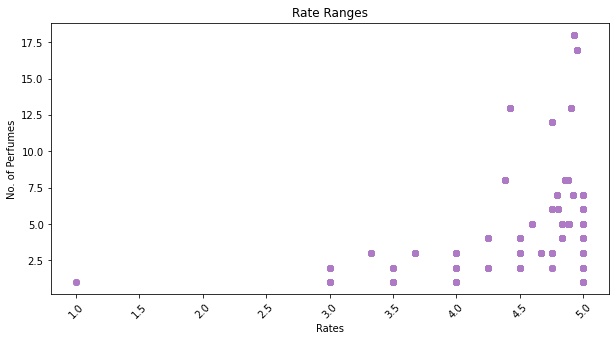

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure(figsize = (10, 5))
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
# creating the bar plot
plt.scatter(Reviews_df.Overall_rating,Reviews_df.rate_count, color ='#AF7AC5')
 
plt.xlabel("Rates")
plt.ylabel("No. of Users")
plt.title("Rate Ranges")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Top 10 high rating brands we have 
Top_10 = Reviews_df.groupby('Brand').agg({'Overall_rating': "max", 'rate_count':'max'}).sort_values(by=['rate_count'], ascending=False)
Top_10.head(10)

,Overall_rating,rate_count
Brand,,
Mancera,5.0,18
Roberto Cavalli,5.0,17
Mont Blanc,5.0,13
Versace,5.0,13
Guerlain,5.0,8
Calvin Klein,5.0,8
Candy Addict,5.0,7
Who Am I,5.0,7
Lancome,5.0,6


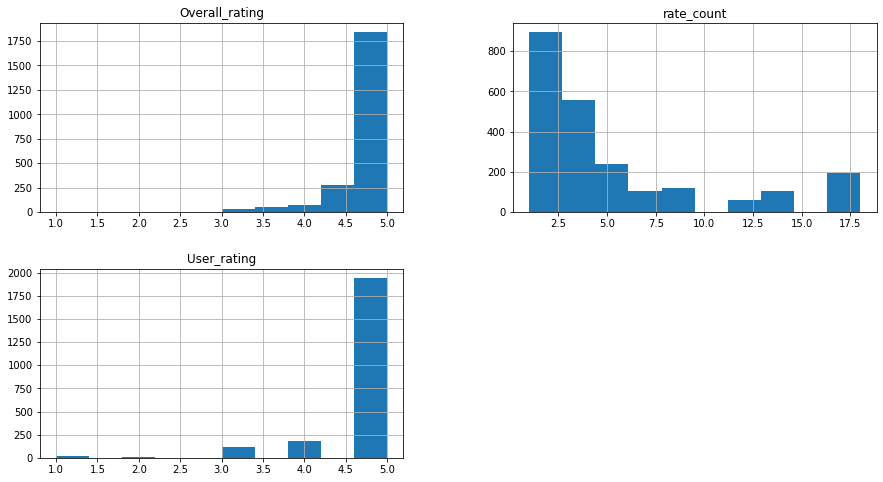

In [18]:
Reviews_df.hist(figsize = (15,8))
plt.show()

### Conclousion 
After the EDA stage I decided to build a content based recommendation system, because I don't have enough rating data majority of Perfumes don't have any rating avaliable in GoldenScent website. 
Therefore, I will fouses on perfume features such as Fragrance_Family, Ingredients,.. to build a content-based similarity model based on Cosine similarity.